Message: Hello, can you please help me? - Classification: genuine
Message: I love governance and global politics! - Classification: genuine
Message: Need your assistance. - Classification: genuine
Message: Buy now, limited time offer! - Classification: spam
Message: Just wanted to say hi. - Classification: genuine
Message: Claim your free gift! - Classification: spam
Message: I have a question. - Classification: spam
Message: Make money fast! - Classification: spam
Message: Thank you for your support. - Classification: genuine
Message: Unlock exclusive benefits. - Classification: spam
Message: Let's catch up soon. - Classification: genuine
Message: You're a lucky winner! - Classification: spam
Message: Win some lottery money now. - Classification: spam
Message: Limited time sale! - Classification: spam
Message: Impressive! Do you know that you can win a lottery now? - Classification: spam
Message: Become a millionaire! - Classification: spam
Message: Invest, refer five persons and get 

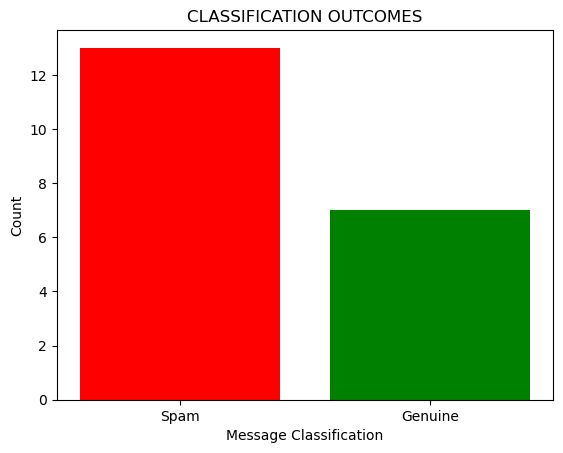

In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict
import re as regExp

class MultinomialNaiveBayesClassifier:
    def __init__(self):
        self.classes = defaultdict(int)
        self.class_word_counts = defaultdict(lambda: defaultdict(int))
        self.vocabulary = set()

    def train(self, training_data):
        for message, label in training_data:
            self.classes[label] += 1
            words = self.preprocess_text(message)
            for word in words:
                self.class_word_counts[label][word] += 1
                self.vocabulary.add(word)
                
        #print(self.classes)
        #print()
        #print(self.class_word_counts)
        #print()
        #print(self.vocabulary)
        #print()

    def classify(self, message):
        words = self.preprocess_text(message)
        probabilities = {}
        for label in self.classes:
            class_prob = self.classes[label] / sum(self.classes.values())
            word_probs = 1.0
            for word in words:
                word_prob = (self.class_word_counts[label][word] + 1) / (sum(self.class_word_counts[label].values()) + len(self.vocabulary))
                word_probs *= word_prob
            probabilities[label] = class_prob * word_probs

        return max(probabilities, key=probabilities.get)

    def preprocess_text(self, text):
        words = regExp.findall(r'\b\w+\b', text.lower())
        return words

# Example usage
training_data = [
    ("Hello, how are you?", "genuine"),
    ("Free money! Claim now.", "spam"),
    ("Need your help with something.", "genuine"),
    ("Get rich quick!", "spam"),
    ("Hi there, just checking in.", "genuine"),
    ("Limited time offer! Buy now.", "spam"),
    ("Can you please send me the file?", "genuine"),
    ("Make money from home.", "spam"),
    ("I appreciate your help.", "genuine"),
    ("Exclusive deal for you!", "spam"),
    ("Let's meet for coffee.", "genuine"),
    ("You've won a lottery!", "spam"),
    ("Thanks for your assistance.", "genuine"),
    ("Special discount on selected items.", "spam"),
    ("Please reply as soon as possible.", "genuine"),
    ("Earn money with this amazing opportunity!", "spam"),
    ("Could you please provide more details?", "genuine"),
    ("Limited stock available.", "spam"),
    ("Looking forward to hearing from you.", "genuine"),
    ("Don't miss out on this offer!", "spam"),
]

# Create and train the classifier
classifier = MultinomialNaiveBayesClassifier()
classifier.train(training_data)

test_messages = [
    "Hello, can you please help me?",
    "I love governance and global politics!",
    "Need your assistance.",
    "Buy now, limited time offer!",
    "Just wanted to say hi.",
    "Claim your free gift!",
    "I have a question.",
    "Make money fast!",
    "Thank you for your support.",
    "Unlock exclusive benefits.",
    "Let's catch up soon.",
    "You're a lucky winner!",
    "Win some lottery money now.",
    "Limited time sale!",
    "Impressive! Do you know that you can win a lottery now?",
    "Become a millionaire!",
    "Invest, refer five persons and get a bonus.",
    "Huge discounts available now!",
    "Can we set up a meeting?",
    "Last chance to save big!",
]

for message in test_messages:
    classification = classifier.classify(message)
    print(f"Message: {message} - Classification: {classification}")

# Train the classifier
classifier = MultinomialNaiveBayesClassifier()
classifier.train(training_data)

# Classify the test messages
results = []
for message in test_messages:
    classification = classifier.classify(message)
    results.append((message, classification))

# Prepare the data for visualization
spam_count = sum(1 for _, label in results if label == "spam")
genuine_count = sum(1 for _, label in results if label == "genuine")
labels = ["Spam", "Genuine"]
counts = [spam_count, genuine_count]
colors = ["red", "green"]

print(f"\nNumber of Spam Messages: {spam_count}\nNumber of Genuine Messages: {genuine_count}\n")
# Plot the results
plt.bar(labels, counts, color=colors)
plt.xlabel("Message Classification")
plt.ylabel("Count")
plt.title("CLASSIFICATION OUTCOMES")
plt.show()


Number of Non Humorous Messages: 3977
Number of Humorous Messages: 4023

Accuracy: 90.58%


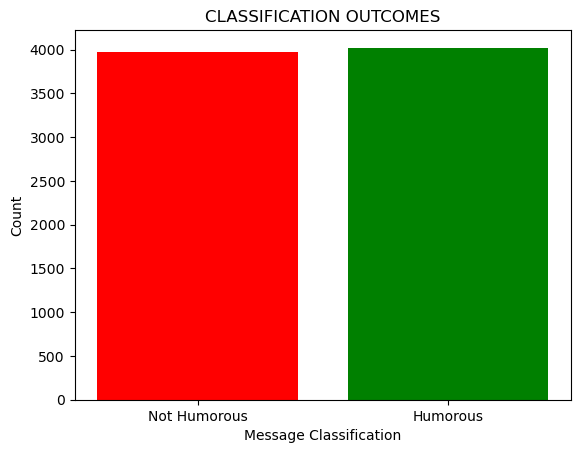

+-----------------------------------------------------------------------------------------------------+-------------+--------------+
| Message                                                                                             | Predicted   | True Label   |
+=====================================================================================================+=============+==============+
| How did jared lose 30 pounds? he dumped his girlfriend.                                             | True        | True         |
+-----------------------------------------------------------------------------------------------------+-------------+--------------+
| Can a magic spell really help your love life?                                                       | True        | False        |
+-----------------------------------------------------------------------------------------------------+-------------+--------------+
| Meet the man trying to bring gay bathhouses back in style          

In [2]:
import pandas as pd
import random
from tabulate import tabulate

# Read data from the CSV file
df = pd.read_csv("C:\\Users\\Udser21\\Downloads\\archive (10)\\dataset.csv")

df.head()


# Convert data to a list of tuples (message, label)
text_and_labels = list(zip(df['text'], df['humor']))
text_and_labels = text_and_labels[:20000]

# Shuffle the data to randomize the order
random.shuffle(text_and_labels)

# Split the data into training and test sets (60% for training, 40% for testing)
split_index = int(0.6 * len(text_and_labels))
training_data = text_and_labels[:split_index]
test_data = text_and_labels[split_index:]

# Create and train the classifier
classifier = MultinomialNaiveBayesClassifier()
classifier.train(training_data)

# Prepare the data for visualization
nonhumor_count = sum(1 for _, label in test_data if label == False)
humor_count = sum(1 for _, label in test_data if label == True)
labels = ["Not Humorous", "Humorous"]
counts = [nonhumor_count, humor_count]
colors = ["red", "green"]

print(f"\nNumber of Non Humorous Messages: {nonhumor_count}\nNumber of Humorous Messages: {humor_count}\n")

# Classify the test messages and create the results table
results_table = []
correct_predictions = 0
for message, true_label in test_data:
    classification = classifier.classify(message)
    results_table.append((message, classification, true_label))
    if classification == true_label:
        correct_predictions += 1
        
accuracy = correct_predictions / len(test_data)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the results
plt.bar(labels, counts, color=colors)
plt.xlabel("Message Classification")
plt.ylabel("Count")
plt.title("CLASSIFICATION OUTCOMES")
plt.show()
        
# Display the results table using tabulate
headers = ["Message", "Predicted", "True Label"]
print(tabulate(results_table, headers=headers, tablefmt="grid"))
